In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv('../../code/data/pokemon.csv')

Check whats in the dataset
check the distributions of all relevant numerical stats

In [3]:
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [4]:
data.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [5]:
relevant_columns = ['attack', 'defense', 'hp', 'sp_attack', 'sp_defense', 'speed', 'base_total', 'type1', 'type2']

In [6]:
data = data[relevant_columns]
data['type1'] = data['type1'].astype('category')
data['type2'] = data['type2'].astype('category')

In [7]:
data.shape

(801, 9)

In [8]:
data.dtypes

attack           int64
defense          int64
hp               int64
sp_attack        int64
sp_defense       int64
speed            int64
base_total       int64
type1         category
type2         category
dtype: object

<Figure size 640x480 with 0 Axes>

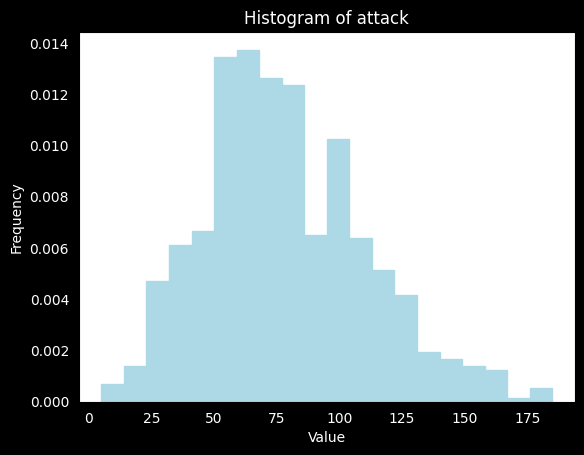

<Figure size 640x480 with 0 Axes>

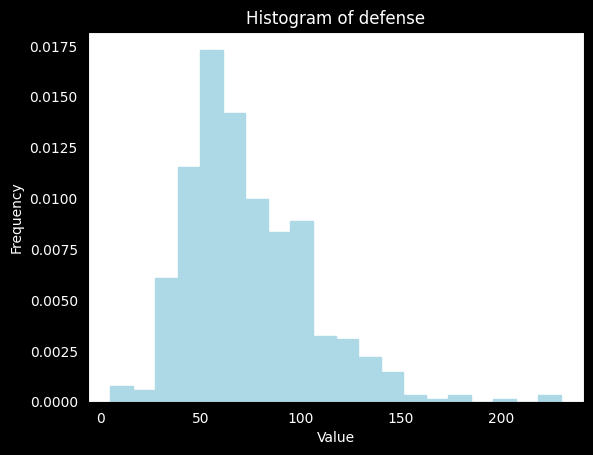

<Figure size 640x480 with 0 Axes>

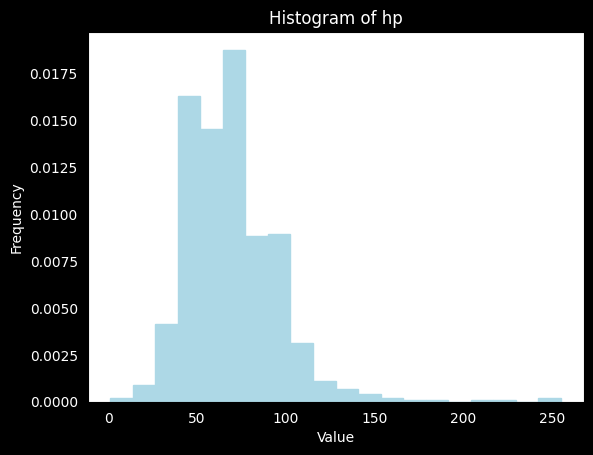

<Figure size 640x480 with 0 Axes>

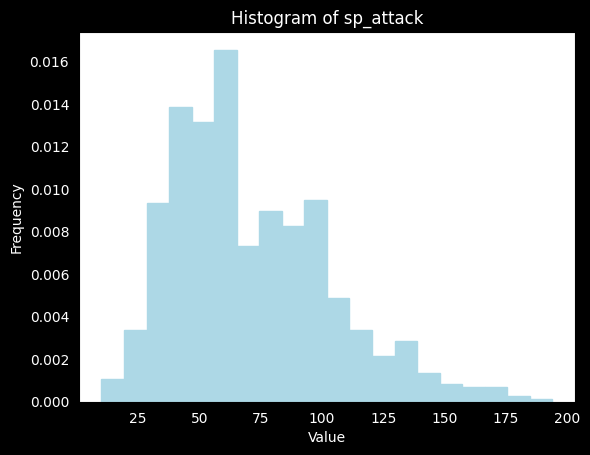

<Figure size 640x480 with 0 Axes>

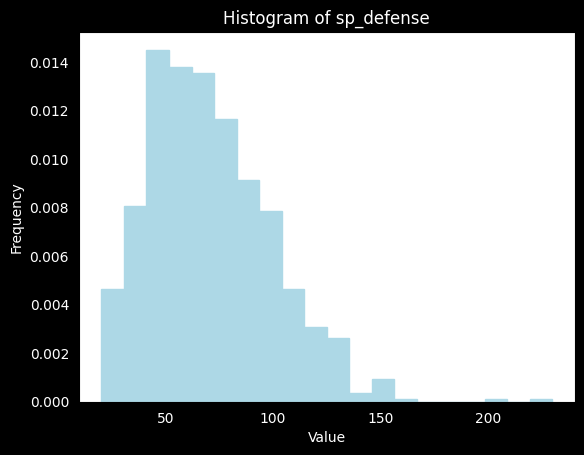

<Figure size 640x480 with 0 Axes>

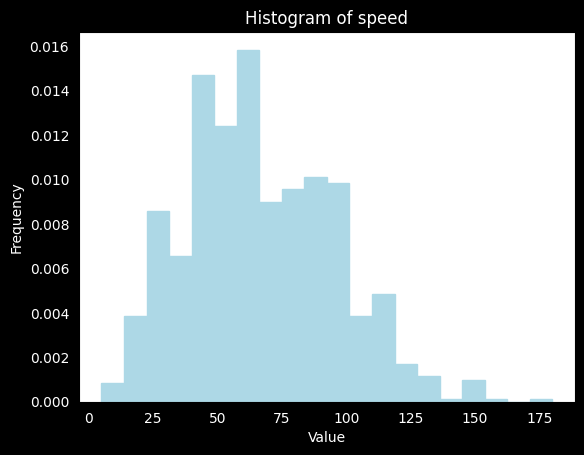

<Figure size 640x480 with 0 Axes>

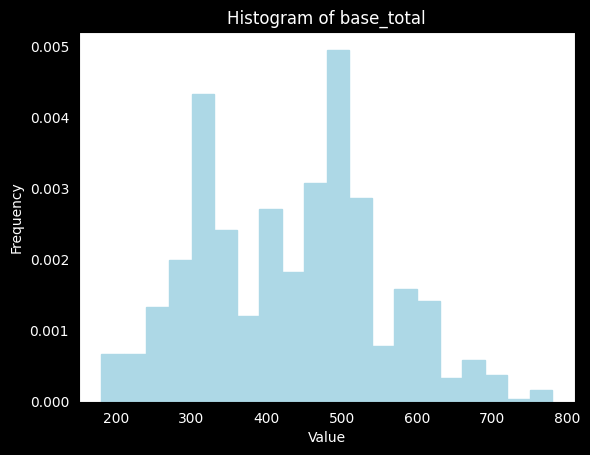

In [9]:
import matplotlib.pyplot as plt
# Loop through each column in the DataFrame and create a histogram
for column in data.columns:
    # skip categorical columns
    if column == 'type1' or column == 'type2':
        continue
    # Create a figure with a black background
    plt.figure()
    fig, ax = plt.subplots(facecolor='black')
    # plt.figure()  # Create a new figure for each histogram
    plt.hist(data[column], bins=20, density=True, color='lightblue', edgecolor='lightblue')  # Adjust the number of bins as needed
    plt.title(f'Histogram of {column}', color='white')
    plt.xlabel('Value', color='white')
    plt.ylabel('Frequency', color='white')
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.show()

In [10]:
data.to_csv('../../code/data/cleaned_pokemon.csv', index=False)

In [12]:
cleaned = pd.read_csv('../../code/data/cleaned_pokemon.csv')

In [14]:
cleaned.head()

,attack,defense,hp,sp_attack,sp_defense,speed,base_total,type1,type2
0,49,49,45,65,65,45,318,grass,poison
1,62,63,60,80,80,60,405,grass,poison
2,100,123,80,122,120,80,625,grass,poison
3,52,43,39,60,50,65,309,fire,NaN
4,64,58,58,80,65,80,405,fire,NaN


In [15]:
# pass function to df.apply 
def convert_nan_to_none(val):
    if pd.isna(val):
        return None
    else:
        return val
    
cleaned['type2'] = cleaned['type2'].apply(convert_nan_to_none)
cleaned.head()

,attack,defense,hp,sp_attack,sp_defense,speed,base_total,type1,type2
0,49,49,45,65,65,45,318,grass,poison
1,62,63,60,80,80,60,405,grass,poison
2,100,123,80,122,120,80,625,grass,poison
3,52,43,39,60,50,65,309,fire,None
4,64,58,58,80,65,80,405,fire,None


In [16]:
cleaned.to_csv('../../code/data/cleaned_pokemon.csv', index=False)